## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [ ]:
# Your code here - remember to use markdown cells for comments as well!

In [1]:
import pandas as pd
import gzip
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
from IPython.display import Image
Image(filename='movie_data_erd.jpeg') 

In [ ]:
import zipfile
import sqlite3

with zipfile.ZipFile('zippedData/im.db.zip', 'r') as zip_ref:
    zip_ref.extractall('zippedData/')

conn = sqlite3.connect('zippedData/im.db')
cur = conn.cursor()
pd.read_sql_query("""

SELECT * 
FROM movie_basics;


""", conn)


In [ ]:
pd.read_sql_query("""

SELECT * 
FROM movie_ratings;


""", conn)

In [ ]:
pd.read_sql_query("""

SELECT * 
FROM sqlite_master 
WHERE type='table';



""", conn)

In [10]:
pd.set_option("display.max_rows", None)

In [ ]:
pd.reset_option("display.max_rows")

In [ ]:
pd.read_sql_query("""

SELECT primary_title, runtime_minutes, genres, averagerating
FROM movie_basics
JOIN movie_ratings
    USING(movie_id)
    WHERE averagerating > 8 AND runtime_minutes <= 130;

""", conn)

In [ ]:
pd.read_sql_query("""

SELECT runtime_minutes, COUNT(*) as count
FROM (
    SELECT primary_title, runtime_minutes, genres, averagerating
    FROM movie_basics
    JOIN movie_ratings
        USING(movie_id)
        WHERE runtime_minutes IS NOT NULL AND averagerating IS NOT NULL
        ORDER BY averagerating DESC
)
GROUP BY runtime_minutes
ORDER BY count DESC;

""", conn)

In [ ]:
df = pd.read_sql_query("""

SELECT runtime_minutes, averagerating
FROM movie_basics
JOIN movie_ratings
    USING(movie_id)
    WHERE runtime_minutes IS NOT NULL AND averagerating IS NOT NULL AND averagerating >= 9 AND runtime_minutes BETWEEN 80 AND 130
    ORDER BY runtime_minutes DESC, averagerating DESC
    limit 100;

""", conn)

df

In [ ]:
sns.barplot(x='runtime_minutes', y='averagerating', data=df)
plt.title('Run Time vs. Average Ratings')
plt.show()



In [ ]:
conn.close()

Plot above is example, average runtime is 80-120 minutes for most successful films when looking through data. 

In [2]:
master = pd.read_csv('masterdataset.csv')
master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         1459 non-null   int64  
 1   id                 1459 non-null   int64  
 2   release_date       1459 non-null   object 
 3   movie              1459 non-null   object 
 4   production_budget  1459 non-null   object 
 5   domestic_gross     1459 non-null   object 
 6   worldwide_gross    1459 non-null   object 
 7   year               1459 non-null   int64  
 8   movie_id           1459 non-null   object 
 9   original_title     1459 non-null   object 
 10  runtime_minutes    1459 non-null   float64
 11  genres             1459 non-null   object 
 12  averagerating      1459 non-null   float64
 13  numvotes           1459 non-null   float64
dtypes: float64(3), int64(3), object(8)
memory usage: 159.7+ KB


In [11]:
master['numvotes'] #drop extra

0        447624.0
1         24451.0
2        665594.0
3        670926.0
4        329135.0
5        352504.0
6       1387769.0
7        226243.0
8        208827.0
9        241792.0
10       366366.0
11       583507.0
12       576909.0
13       719629.0
14       565563.0
15       438621.0
16       179774.0
17       228592.0
18      1183655.0
19       647288.0
20       525632.0
21       225342.0
22       119007.0
23       539338.0
24       309879.0
25       283486.0
26       239480.0
27       516148.0
28       203510.0
29       478592.0
30       213542.0
31       682218.0
32       692794.0
33       358813.0
34       592221.0
35       291887.0
36       192045.0
37       620079.0
38       388363.0
39       138914.0
40       163151.0
41       252281.0
42       366409.0
43       154345.0
44       123127.0
45       335074.0
46       445535.0
47       553751.0
48       433165.0
49       443667.0
50        91465.0
51       338728.0
52       237720.0
53       209844.0
54       376241.0
55        

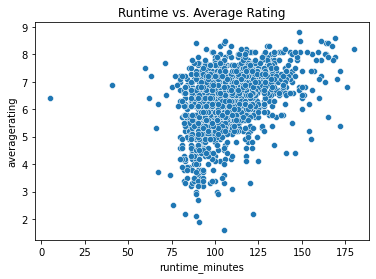

In [4]:
sns.scatterplot(x='runtime_minutes', y='averagerating', data=master)
plt.title('Runtime vs. Average Rating')
plt.show()


In [5]:
master['genres'].value_counts()

Adventure,Animation,Comedy    67
Comedy                        53
Action,Adventure,Sci-Fi       52
Comedy,Drama,Romance          51
Drama                         50
                              ..
Adventure,Comedy,Romance       1
Drama,Fantasy,Music            1
Action,Adventure               1
Comedy,Drama,Sport             1
Adventure,Drama                1
Name: genres, Length: 226, dtype: int64

In [6]:
master['worldwide_gross']

0       $1,045,663,875
1         $149,762,350
2       $1,403,013,963
3       $2,048,134,200
4         $655,945,209
             ...      
1454            $3,547
1455          $489,792
1456                $0
1457                $0
1458                $0
Name: worldwide_gross, Length: 1459, dtype: object

In [7]:
master['worldwide_gross'] = master['worldwide_gross'].apply(lambda x: int(x[1:].replace(',','')))
master['worldwide_gross']

0       1045663875
1        149762350
2       1403013963
3       2048134200
4        655945209
           ...    
1454          3547
1455        489792
1456             0
1457             0
1458             0
Name: worldwide_gross, Length: 1459, dtype: int64

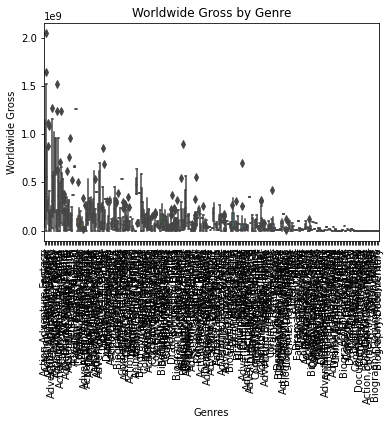

In [8]:
sns.boxplot(x='genres', y='worldwide_gross', data=master)
plt.title('Worldwide Gross by Genre')
plt.xlabel('Genres')
plt.ylabel('Worldwide Gross')
plt.xticks(rotation=90)
plt.show()


In [11]:
master.head()

,Unnamed: 0,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,title,studio,domestic_gross_x,foreign_gross,year,id,release_date,movie,production_budget,domestic_gross_y,worldwide_gross
0,54,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",7.3,275300.0,The Secret Life of Walter Mitty,Fox,58200000.0,129900000,2013.0,37.0,"Dec 25, 2013",The Secret Life of Walter Mitty,"$91,000,000","$58,236,838",187861183
1,58,tt0365907,A Walk Among the Tombstones,A Walk Among the Tombstones,2014,114.0,"Action,Crime,Drama",6.5,105116.0,A Walk Among the Tombstones,Uni.,26300000.0,26900000,2014.0,67.0,"Sep 19, 2014",A Walk Among the Tombstones,"$28,000,000","$26,017,685",62108587
2,60,tt0369610,Jurassic World,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",7.0,539338.0,Jurassic World,Uni.,652300000.0,"1,019.4",2015.0,34.0,"Jun 12, 2015",Jurassic World,"$215,000,000","$652,270,625",1648854864
3,62,tt0376136,The Rum Diary,The Rum Diary,2011,119.0,"Comedy,Drama",6.2,94787.0,The Rum Diary,FD,13100000.0,10800000,2011.0,16.0,"Oct 28, 2011",The Rum Diary,"$45,000,000","$13,109,815",21544732
4,67,tt0383010,The Three Stooges,The Three Stooges,2012,92.0,"Comedy,Family",5.1,28570.0,The Three Stooges,Fox,44300000.0,10500000,2012.0,4.0,"Apr 13, 2012",The Three Stooges,"$30,000,000","$44,338,224",54052249


ROI = Net income / Cost of investment x 100

In [12]:
#First check datatypes of both columns of production_budget and worldwide_gross

master['production_budget'].value_counts()

$40,000,000     67
$10,000,000     64
$20,000,000     59
$30,000,000     56
$5,000,000      55
                ..
$108,000,000     1
$7,500,000       1
$19,500,000      1
$50,000          1
$8,300,000       1
Name: production_budget, Length: 213, dtype: int64

In [13]:
master['worldwide_gross'].value_counts()

4495262      10
1200000       8
101134059     8
854235992     8
13214051      7
             ..
36275469      1
1324299       1
465195589     1
60611845      1
76347393      1
Name: worldwide_gross, Length: 1135, dtype: int64

In [17]:
pro_budget_mean = master['production_budget'].median()

#master['production_budget'].fillna(master['production_budget'.median(), inplace=True)
#master.head()


TypeError: 

In [15]:
#Error returned as there are non-numeric characters such as $ and , in both columns.

#Using the pandas.to_numeric() function to convert the columns to numeric values before the calculation.
master['production_budget'] = pd.to_numeric(master['production_budget'].replace(['[$,]'],''), errors='coerce')
master['worldwide_gross'] = pd.to_numeric(master['worldwide_gross'].replace(['[$,]'],''), errors='coerce')

#WIll now add the column of ROI and run the formula
master['ROI'] = (master['production_budget'] / master['worldwide_gross']) * 100
master.head()

,Unnamed: 0,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,title,...,domestic_gross_x,foreign_gross,year,id,release_date,movie,production_budget,domestic_gross_y,worldwide_gross,ROI
0,54,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",7.3,275300.0,The Secret Life of Walter Mitty,...,58200000.0,129900000,2013.0,37.0,"Dec 25, 2013",The Secret Life of Walter Mitty,NaN,"$58,236,838",NaN,NaN
1,58,tt0365907,A Walk Among the Tombstones,A Walk Among the Tombstones,2014,114.0,"Action,Crime,Drama",6.5,105116.0,A Walk Among the Tombstones,...,26300000.0,26900000,2014.0,67.0,"Sep 19, 2014",A Walk Among the Tombstones,NaN,"$26,017,685",NaN,NaN
2,60,tt0369610,Jurassic World,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",7.0,539338.0,Jurassic World,...,652300000.0,"1,019.4",2015.0,34.0,"Jun 12, 2015",Jurassic World,NaN,"$652,270,625",NaN,NaN
3,62,tt0376136,The Rum Diary,The Rum Diary,2011,119.0,"Comedy,Drama",6.2,94787.0,The Rum Diary,...,13100000.0,10800000,2011.0,16.0,"Oct 28, 2011",The Rum Diary,NaN,"$13,109,815",NaN,NaN
4,67,tt0383010,The Three Stooges,The Three Stooges,2012,92.0,"Comedy,Family",5.1,28570.0,The Three Stooges,...,44300000.0,10500000,2012.0,4.0,"Apr 13, 2012",The Three Stooges,NaN,"$44,338,224",NaN,NaN


In [10]:
#Adding column of ROI

#master['ROI'] = (master['production_budget'] / master['worldwide_gross']) * 100

#master.head()


TypeError: unsupported operand type(s) for /: 'str' and 'str'